# Part I - Dataset Exploration for FordGobike trip data
## by Ntebogang Eric Makwati



# Introduction

This document delves into the FordGoBike trip data for the San Francisco Bay area, sourced from System data. With a focus on trip details, user information, bike station data, geographical coordinates, and temporal patterns, this dataset offers a comprehensive view of biking dynamics in the region. Each record represents an individual ride, encompassing 16 features, including member age, gender, ride start/end times, start/end station coordinates, and more. The majority of riders fall between the ages of 18 and 41, although some records indicate riders over 80 or even 100 years old. To facilitate analysis, new fields were derived from existing features, such as Member Age, Start day, End day, Start hr, End hr, and Start Year.

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

#### Load the dataset chosen for study

In [3]:
Bikedata = pd.read_csv('201902-fordgobike-tripdata.csv')

#View the first 10 records of this dataset
Bikedata.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
# high level overview of the data shape and composition
Bikedata.shape

(183412, 16)

In [5]:
# Check the sum of missing or null values
Bikedata.isnull().sum().sum()

17318

There are 17318 missing values in this dataset.

In [6]:
### List of the columns in this dataset
Bikedata.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [7]:
#Check the Bike data structure
Bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

There are 183,412 trips in the dataset with 16 features(duration_sec, start_time, end_time, start_station_id,start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Most variables are numeric with others which are strings.

While most columns have complete data, some, like start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, and member_gender, have missing values. This dataset provides a comprehensive foundation for exploring and analyzing bike-sharing patterns in the greater San Francisco Bay area.


### What is/are the main feature(s) of interest in your dataset?


The main features of interest Distribution of trip durations, distribution of user types, distribution of User genders, Daily Ride Frequency, Hourly Ride Frequency, distribution of user ages, duration distribution per gender and user type, and usage patterns over different times by different user types and gender.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

duration_sec, start_time, end_time, start_station_latitude, start_station_longitude, end_station_longitude, end_station_latitude, bike_share_for_all_trip, member_gender, member_birth_year, and user_type

## Data Wrangling

In [8]:
# Quality Issues

# Check for columns with null or missing
Bikedata.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
# Quality Issues
# Check column dtype for each column
Bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [10]:
# Check for duplicates in the entire DataFrame
duplicates_in_df = Bikedata.duplicated()

# Check if any duplicates exist in the DataFrame
if duplicates_in_df.any():
    print("Duplicates found in the DataFrame:")
    print(df[duplicates_in_df])
else:
    print("No duplicates in the DataFrame.")

No duplicates in the DataFrame.


In [11]:
# Calculate the percentage of missing data in each column
missing_percentage = (Bikedata.isnull().sum() / len(Bikedata)) * 100

# Display the result
print("Percentage of missing data in each column:")
print(missing_percentage)

Percentage of missing data in each column:
duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64


#### Data Cleaning and Transformation

In [12]:
## Remove the missing values records - Instead of Imputation

## Copy the raw data into a new dataframe
Bikedata_copy = Bikedata.copy()

# Drop rows with missing values
Bikedata_cleaned = Bikedata_copy.dropna()

# Display the cleaned DataFrame
Bikedata_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [13]:
## Check the structure of the new dataframe after dropping missing values
Bikedata_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [14]:
## Check for Duplicates in the new dataframe
duplicates_in_Bdf = Bikedata_cleaned.duplicated()

# Check if any duplicates exist in the DataFrame
if duplicates_in_Bdf.any():
    print("Duplicates found in the DataFrame:")
    print(df[duplicates_in_Bdf])
else:
    print("No duplicates in the DataFrame.")

No duplicates in the DataFrame.


In [15]:
## Transformation - Conversion of column dtypes: To suit its natural value format

dtype= {'start_time': 'datetime64', 
        'end_time': 'datetime64',
        
        'start_station_id': 'object',
        'end_station_id': 'object',
        
        'member_gender': 'category',
        'member_birth_year': 'int64',
        'user_type': 'category'}

Bikedata_cleaned = Bikedata_cleaned.astype(dtype)

# Check if the conversions were effected
Bikedata_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

# Univariate Exploration


#### Distribution of trip durations

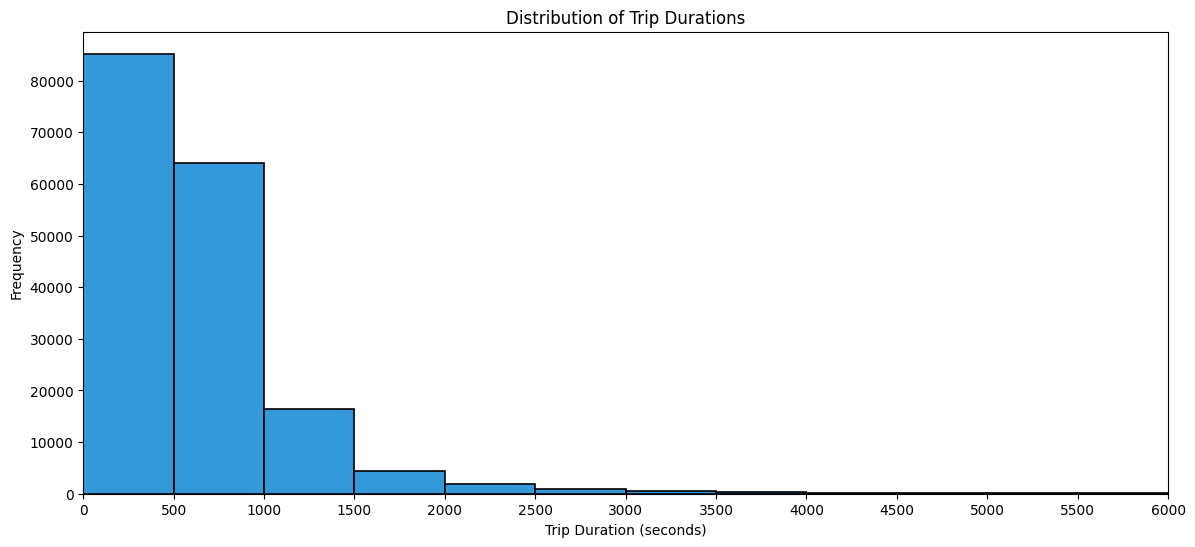

In [16]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, Bikedata_cleaned['duration_sec'].max() + binsize, binsize)

plt.figure(figsize=[14, 6])
plt.hist(data=Bikedata_cleaned, x='duration_sec', bins=bins, color='#3498db', edgecolor='black', linewidth=1.2)

# Set x-axis limits and ticks
plt.xlim(0, 6000) 
plt.xticks(np.arange(0, 6001, 500))

plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')

plt.show()

Trip duration has a long-tailed distribution, with a lot of bike trips on the trip duration end, and few to none on the high duration end. Interestingly, there's a steep jump in frequency right before 500, rather than a smooth ramp up.

#### What is the distribution of user types?

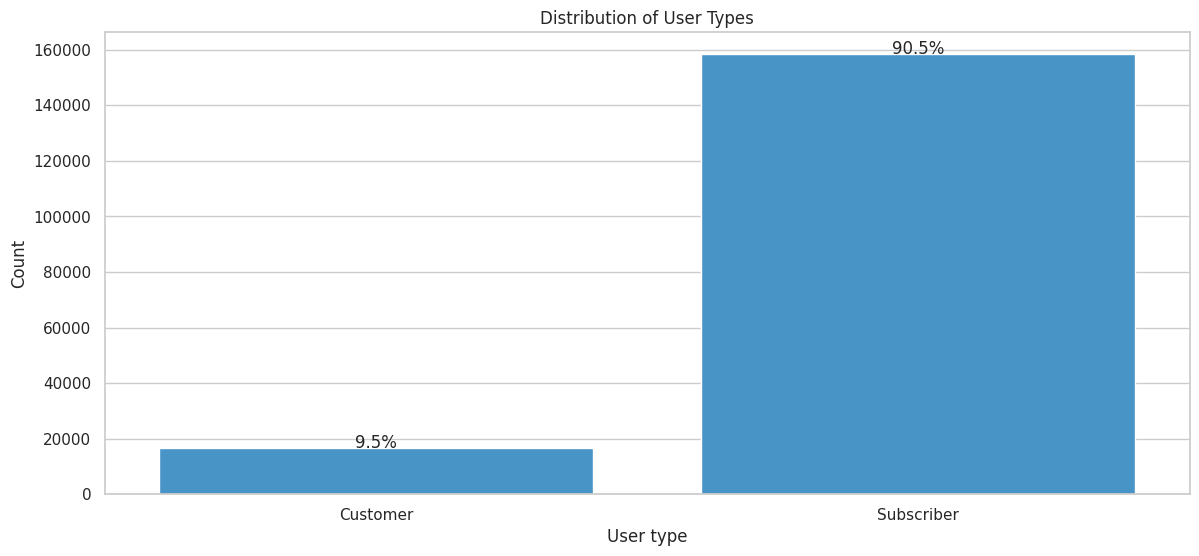

In [17]:
# Assuming you have a DataFrame called Bikedata_cleaned
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))
ax = sns.countplot(data=Bikedata_cleaned, x='user_type', color='#3498db')

plt.xlabel('User type')
plt.ylabel('Count')
plt.title('Distribution of User Types')

# Add percentage labels
total = len(Bikedata_cleaned['user_type'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center")

plt.show()

Subscribers take the majority in instances of the bike trips contained in the dataset, the occupy 90.5% of the records whereas Customers only sit at 9.5%.

#### What is the distribution of User genders?

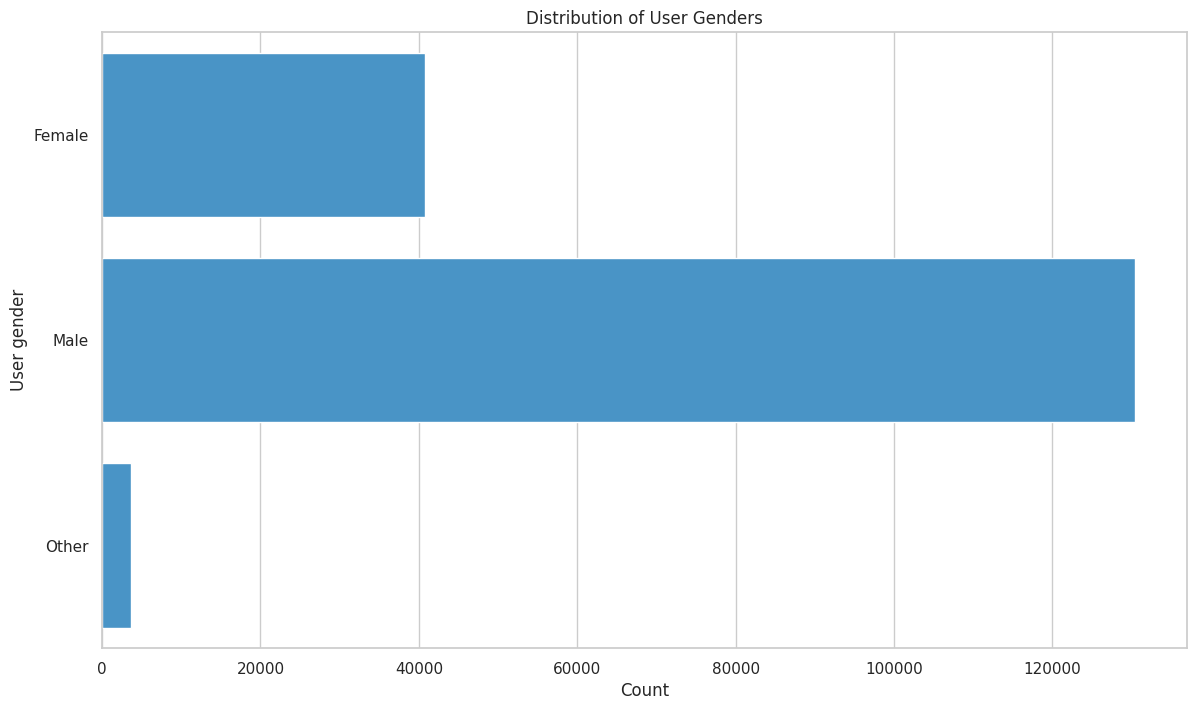

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.countplot(data=Bikedata_cleaned, y='member_gender', color='#3498db')

plt.xlabel('Count')
plt.ylabel('User gender')
plt.title('Distribution of User Genders')

plt.show()

Acording to the plot above we have trips dominated by Males, followed by females and lastly 'Other'.


**Daily Ride Frequency:**
   - What is the distribution of ride frequency throughout the days of the week?

In [19]:
#A function to derive day, month, and year columns from the start and end dates.
def transform_time_columns(df):
    df['Start_day'] = df['start_time'].dt.day_name()
    df['End_day'] = df['end_time'].dt.day_name()
    df['Start_month'] = df['start_time'].dt.month_name()
    df['End_month'] = df['end_time'].dt.month_name()
    df['Start_year'] = df['start_time'].dt.year
    df['End_year'] = df['end_time'].dt.year
    df['Start_hr'] = df['start_time'].dt.strftime('%H')
    df['End_hr'] = df['end_time'].dt.strftime('%H')
    return df

# Generate the columns and include in the bike data
Bikedata_cleaned = transform_time_columns(Bikedata_cleaned)

Bikedata_cleaned.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,Start_day,End_day,Start_month,End_month,Start_year,End_year,Start_hr,End_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,Thursday,Friday,February,March,2019,2019,17,08
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,Thursday,Friday,February,March,2019,2019,12,05
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,Thursday,Friday,February,March,2019,2019,17,04


In [20]:
#Describe the dataframe statistics
Bikedata_cleaned.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,Start_year,End_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.0,174952.0
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,4482.587555,1984.803135,2019.0,2019.0
std,1642.204905,0.100391,0.117732,0.100295,0.117294,1659.195937,10.118731,0.0,0.0
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,11.000000,1878.000000,2019.0,2019.0
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,3799.000000,1980.000000,2019.0,2019.0
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,4960.000000,1987.000000,2019.0,2019.0
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,5505.000000,1992.000000,2019.0,2019.0
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,6645.000000,2001.000000,2019.0,2019.0


In [21]:
# Check the structure
Bikedata_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [22]:
print(sorted(Bikedata_cleaned['End_hr'].unique()))

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']


In [23]:
print([f'{i:02}' for i in range(24)])

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']


In [24]:
# convert day, and hour into ordered categorical types

ordinal_var_dict = {
    'Start_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'End_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'Start_hr': [f'{i:>02}' for i in range(24)],
    'End_hr': [f'{i:>02}' for i in range(24)]
}

# Convert specified columns to ordered categorical types
for var, categories in ordinal_var_dict.items():
    Bikedata_cleaned[var] = pd.Categorical(Bikedata_cleaned[var], categories=categories, ordered=True)


#### What is the distribution of trips by days of week?

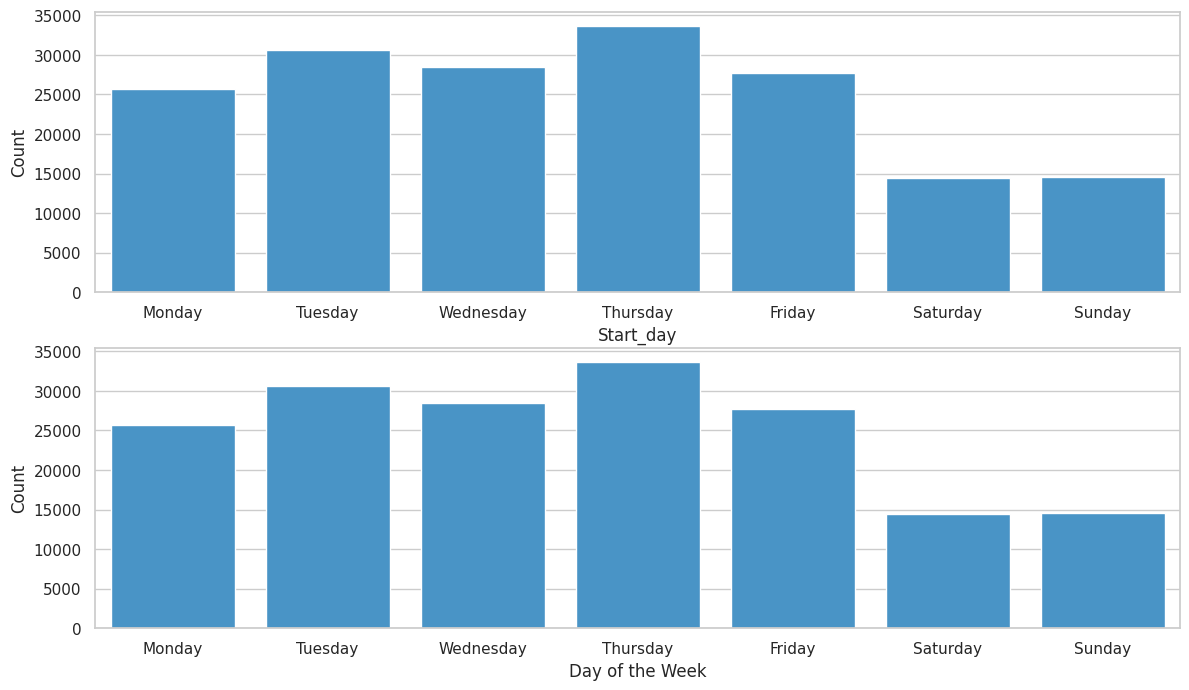

In [25]:
# ride frequency per Start and End days

fig, ax = plt.subplots(2, 1, figsize=[14, 8])

day_columns = ['Start_day', 'End_day']

for i, column in enumerate(day_columns):
    sns.countplot(data=Bikedata_cleaned, x=column, color='#3498db', ax=ax[i], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    ax[i].set_ylabel('Count')

ax[1].set_xlabel('Day of the Week')

plt.show()

Tuesdays and Thursdays are depicted to be peak days of the week. Saturdays and Sundays have low distributions on the trips made throughout the week.

**Hourly Ride Frequency:**
   - How does ride frequency vary throughout the 24-hour day, and are there specific peak hours?

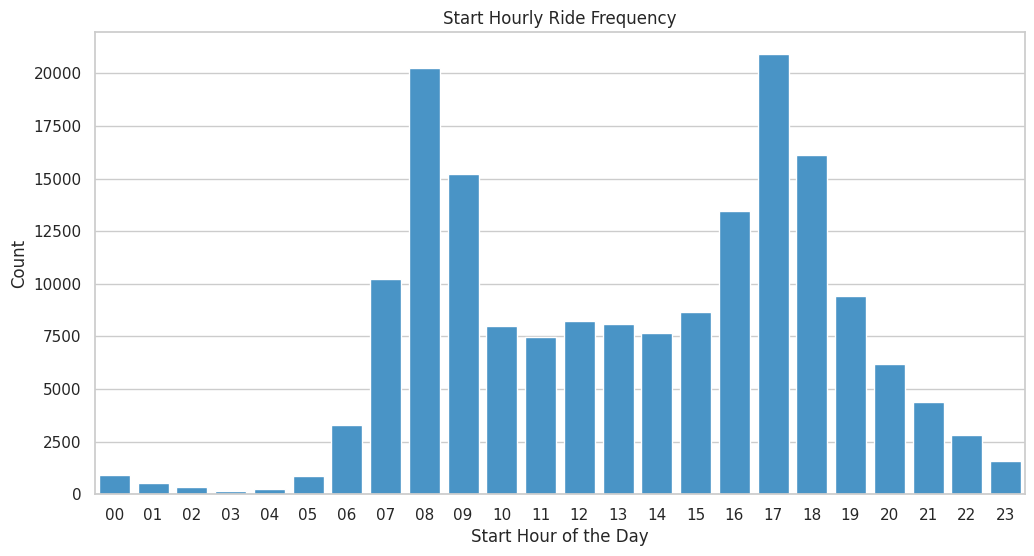

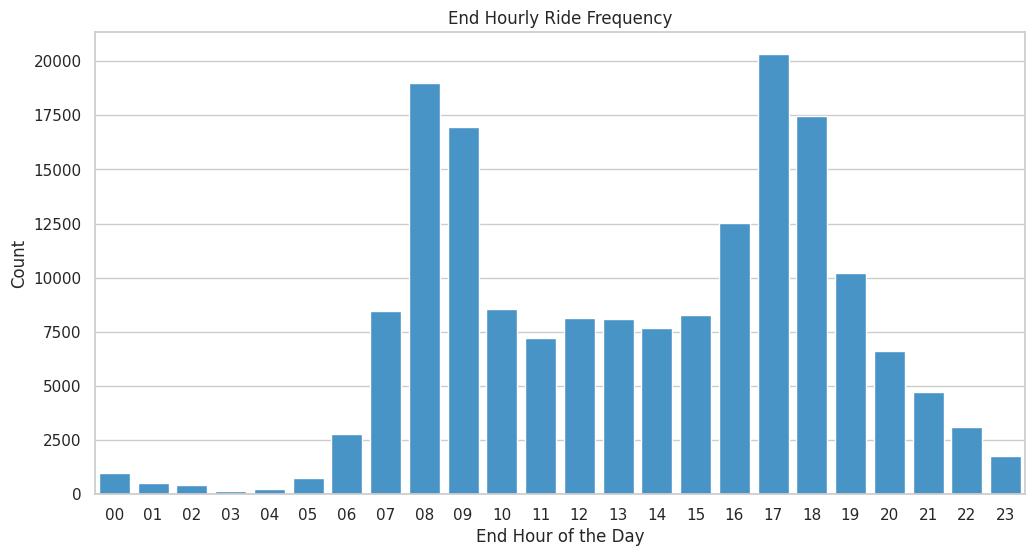

In [26]:
def create_count_plot(data, column, title, xlabel):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=column, color='#3498db')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.show()

# Create count plot for start hours
create_count_plot(Bikedata_cleaned, 'Start_hr', 'Start Hourly Ride Frequency', 'Start Hour of the Day')

# Create count plot for end hours
create_count_plot(Bikedata_cleaned, 'End_hr', 'End Hourly Ride Frequency', 'End Hour of the Day')

For both start and end hourly frequencies 8am and 1700hrs are the peak hours in this dataset. 

#### What is the distribution of user ages?

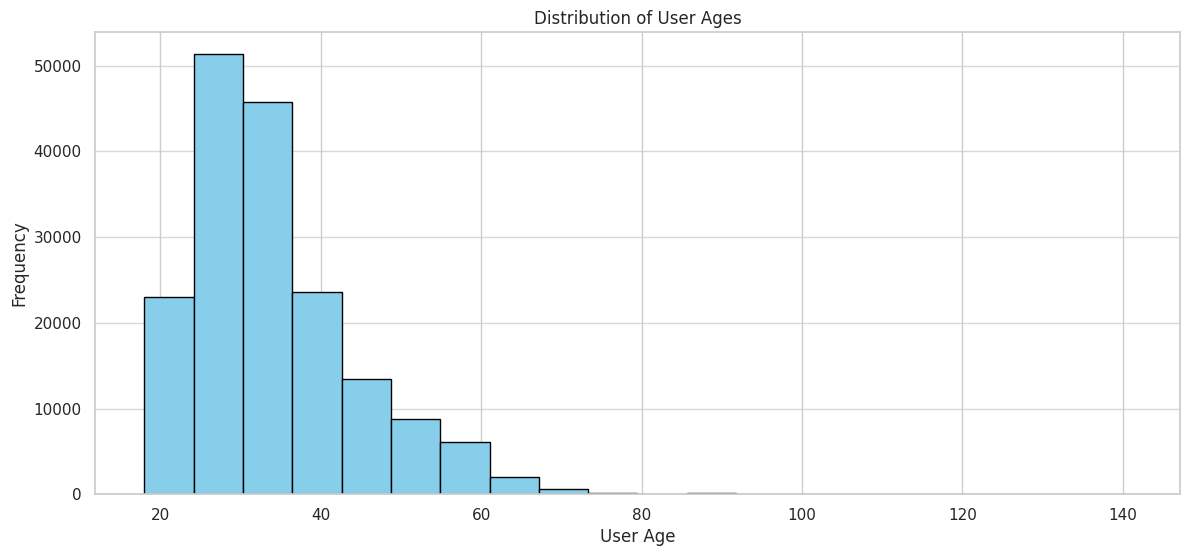

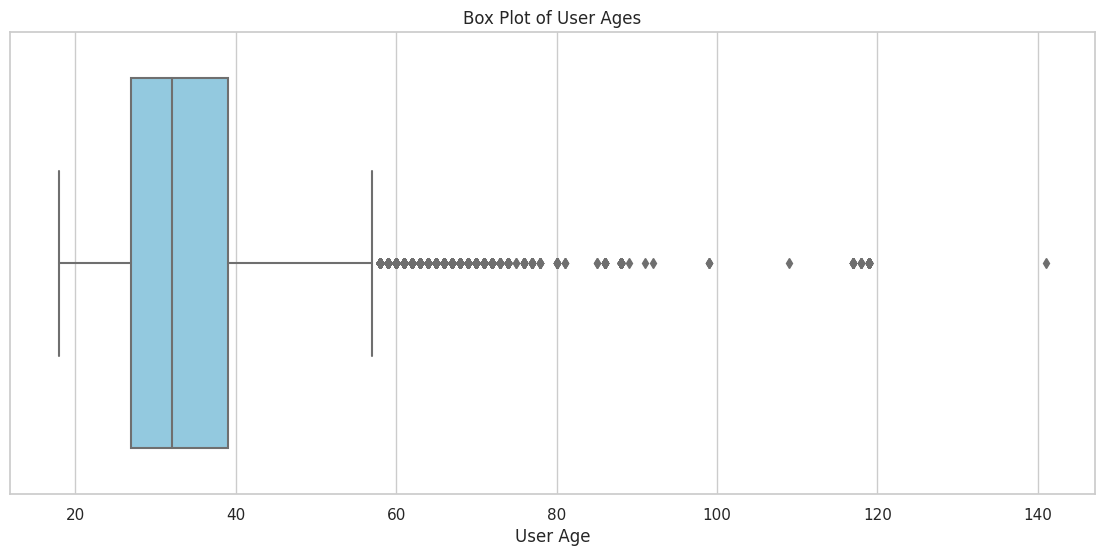

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: user_age, dtype: float64


In [27]:
# Calculate user ages based on the birth year
current_year = 2019 
Bikedata_cleaned['user_age'] = current_year - Bikedata_cleaned['member_birth_year']

# Remove rows with missing or zero birth years
Bikedata_cleaned = Bikedata_cleaned[Bikedata_cleaned['user_age'] > 0]

# Plot the histogram
plt.figure(figsize=(14, 6))
plt.hist(Bikedata_cleaned['user_age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of User Ages')
plt.xlabel('User Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot the box plot
plt.figure(figsize=(14, 6))
sns.boxplot(x=Bikedata_cleaned['user_age'], color='skyblue')
plt.title('Box Plot of User Ages')
plt.xlabel('User Age')
plt.show()

# Calculate summary statistics
age_summary = Bikedata_cleaned['user_age'].describe()
print(age_summary)

From the analysis in the above plots, it shows that most users in this dataset are shown to be ages between 18 and 42yrs. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

From the daily frequency analysis, Tuesday and Thursday shows to be significant days with bike rides. The time between 8am and 1800hrs are depicted to be peak hours from the hourly count plot analysis. More frequency also depicted on weekdays than on weekends.From the analysis in the above plots, it shows that most users in this dataset are shown to be ages between 18 and 42yrs.

Variables of interest like start_time,end_time,start_station_id,end_station_id,member_gender,member_birth_year and user_type were transformed to other data types to suit the analysis. It is worth noting that the start time for this rides was around 0000hrs. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There was some data that was missing values that had to be dropped so that the analysis is not skewed, it is worth noting that imputation was not a method considered due to the above fact. Data cleaning process was done on the variables to standardize the data formats or structure to conform to the analysis requirements.

# Bivariate Explorations

#### How long does each gender spend on rides?

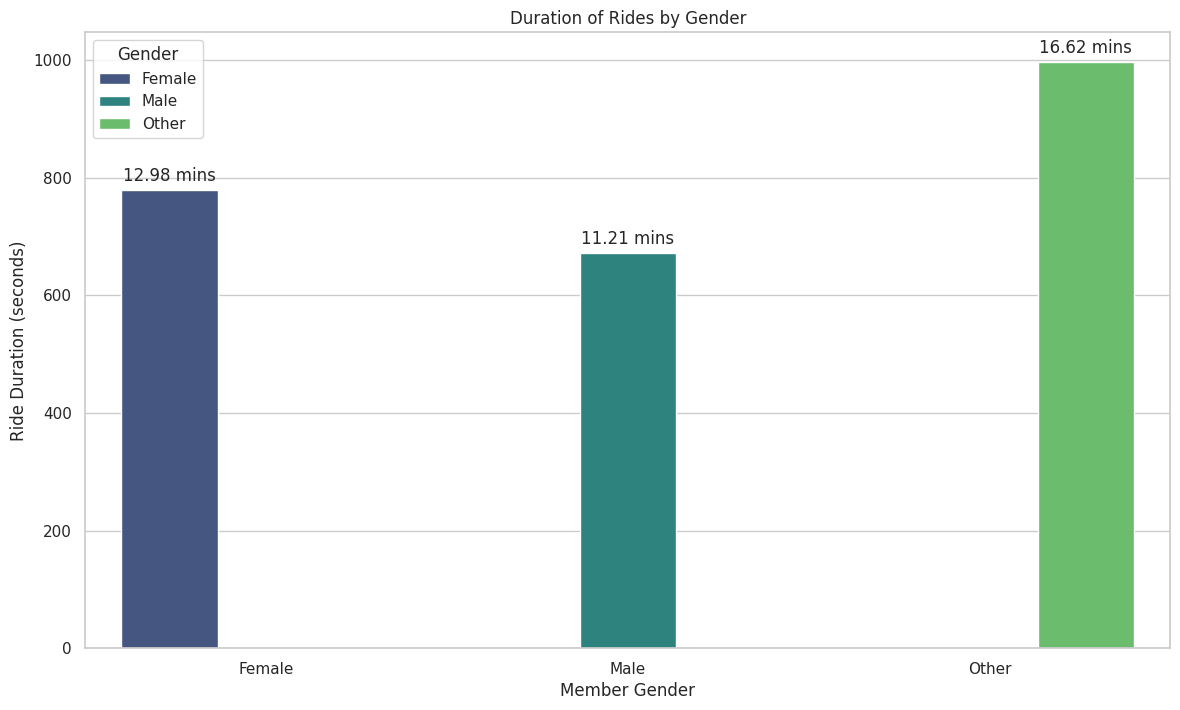

In [47]:
# Create a clustered bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='member_gender', y='duration_sec', hue='member_gender', data=Bikedata_cleaned, errorbar=None, palette='viridis')
plt.title('Duration of Rides by Gender')
plt.xlabel('Member Gender')
plt.ylabel('Ride Duration (seconds)')
plt.legend(title='Gender')

# Add annotations for actual duration in hours
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 60:.2f} mins', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

The gender termed as 'Other' has a higher duration than both male and female, sitting at 16.62. 

#### How do usage patterns change over different times for different user types?

Text(0, 0.5, 'Number of Trips')

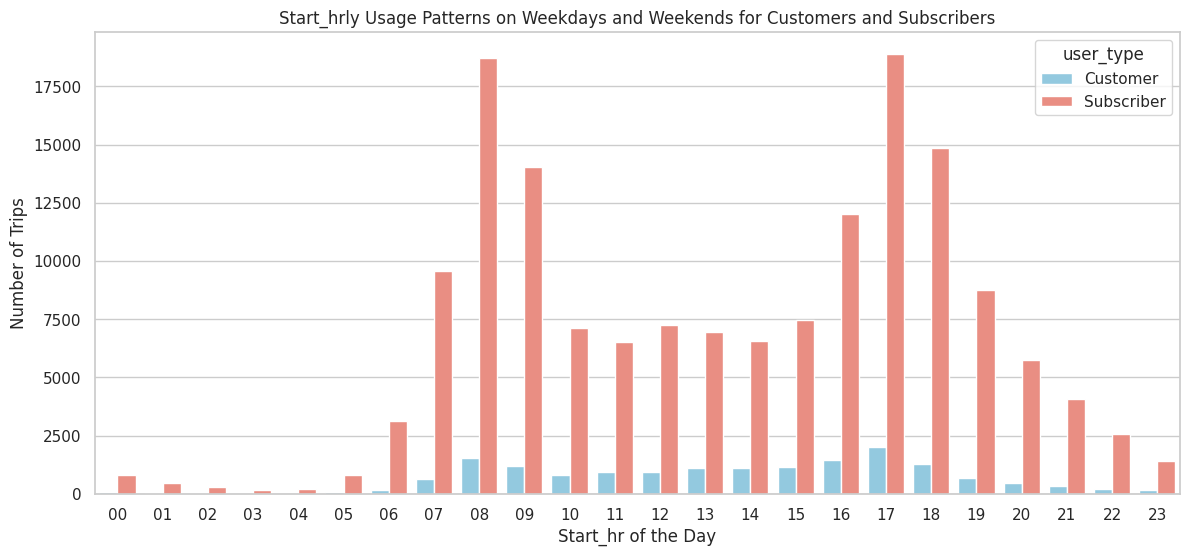

In [43]:
# Create separate DataFrames for customers and subscribers
customers_Bikedata_cleaned = Bikedata_cleaned[Bikedata_cleaned['user_type'] == 'Customer']
subscribers_Bikedata_cleaned = Bikedata_cleaned[Bikedata_cleaned['user_type'] == 'Subscriber']

# Analyze the variation in usage patterns between weekdays and weekends
Bikedata_cleaned['day_of_week'] = Bikedata_cleaned['start_time'].dt.day_name()

plt.figure(figsize=(14, 6))
sns.countplot(x='Start_hr', hue='user_type', data=Bikedata_cleaned, hue_order=['Customer', 'Subscriber'], palette=['skyblue', 'salmon'])
plt.title('Start_hrly Usage Patterns on Weekdays and Weekends for Customers and Subscribers')
plt.xlabel('Start_hr of the Day')
plt.ylabel('Number of Trips')

During the time frame of 7 am to 9 am, there is a notable surge in the number of trips for Subscribers. In the afternoon, specifically between 4:00 pm and 6:00 pm, another peak in trip activity is observed. Customers, while adhering to peak hours, exhibit relatively lower trip counts during these periods.

#### What is the distribution of genders per user age ?

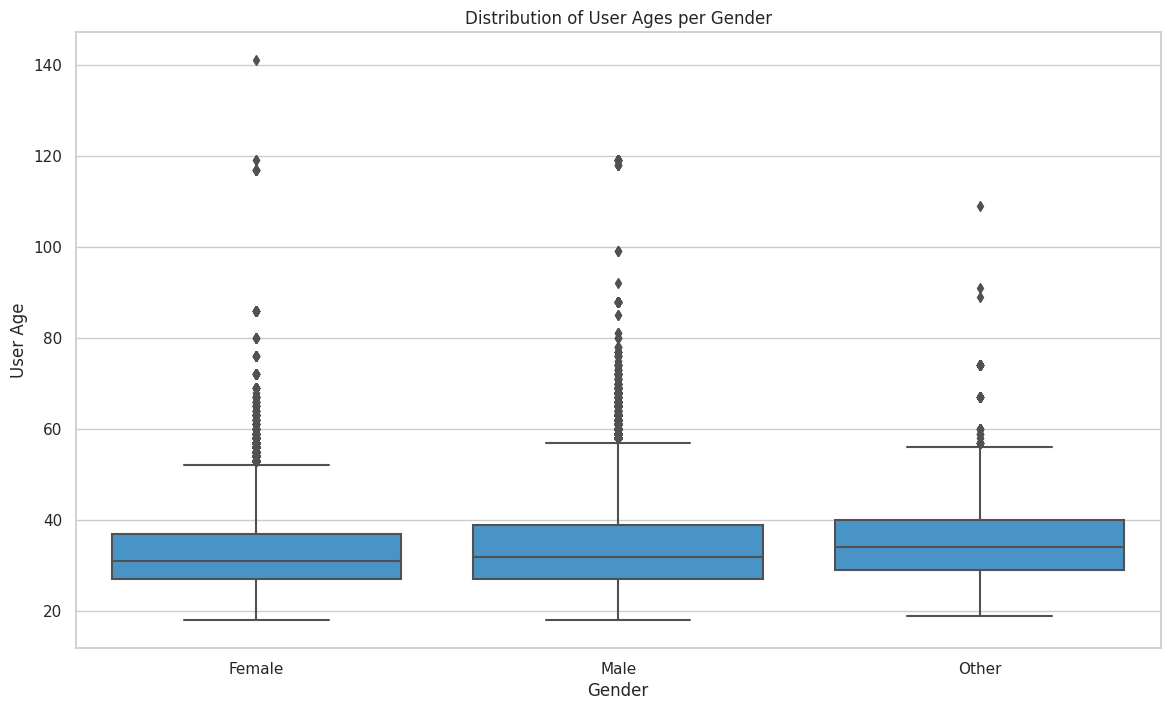

User Age Summary:
                    mean  min  max  quantile   25%   50%   75%   95%
member_gender                                                       
Female         33.223698   18  141      31.0  27.0  31.0  37.0  53.0
Male           34.453617   18  119      32.0  27.0  32.0  39.0  55.0
Other          35.897998   19  109      34.0  29.0  34.0  40.0  55.0



In [97]:
def plot_and_summarize_age_distribution(data):
    # Calculate user ages based on the birth year
    current_year = 2019
    data['user_age'] = current_year - data['member_birth_year']

    # Remove rows with missing or zero birth years
    data = data[data['user_age'] > 0]

    # Create a box plot for the distribution of user ages per gender
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='member_gender', y='user_age', data=data, color='#3498db')
    plt.title('Distribution of User Ages per Gender')
    plt.xlabel('Gender')
    plt.ylabel('User Age')
    plt.show()

    # Print mean, min, max, upper quartile (Q3), and quantiles for each gender
    age_summary = data.groupby('member_gender')['user_age'].agg(['mean', 'min', 'max', 'quantile'])
    age_summary['25%'] = data.groupby('member_gender')['user_age'].quantile(0.25)
    age_summary['50%'] = data.groupby('member_gender')['user_age'].median()
    age_summary['75%'] = data.groupby('member_gender')['user_age'].quantile(0.75)
    age_summary['95%'] = data.groupby('member_gender')['user_age'].quantile(0.95)
    print(f"User Age Summary:\n{age_summary}\n")

# Assuming your dataset is stored in a variable named Bikedata_cleaned
# Call the function with your dataset
plot_and_summarize_age_distribution(Bikedata_cleaned)

As depicted in the plot above, the age distribution for females primarily ranges from 18 to 53 years. Notably, there are instances of female users aged over 60, extending up to 141 years. In contrast, males exhibit a minimum age of 18 and a maximum of 55, with occurrences of users over 60 years old as well.

#### Pairwise correlation between features in the data

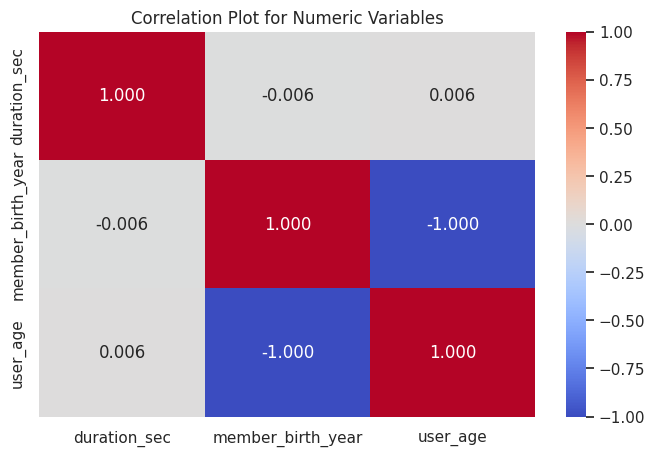

In [58]:
numeric_vars = ['duration_sec', 'member_birth_year', 'user_age']
categoric_vars = ['user_type', 'member_gender', 'Start_day', 'End_day', 'Start_hr', 'End_hr']

# Select relevant columns for the correlation plot
selected_vars = numeric_vars + categoric_vars
selected_data = Bikedata_cleaned[selected_vars]

# Calculate correlation matrix for numeric variables
numeric_corr_matrix = selected_data[numeric_vars].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 5))

# Draw the heatmap with annotations and a color map
sns.heatmap(numeric_corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0)

# Display the correlation plot
plt.title('Correlation Plot for Numeric Variables')
plt.show()

As evident from the visualizations, there is no discernible correlation between 'duration_sec', 'member_birth_year', and 'user_age'. However, a slight negative correlation was observed between 'member_birth_year' and 'user_age'.

#### Which areas are popular per week?

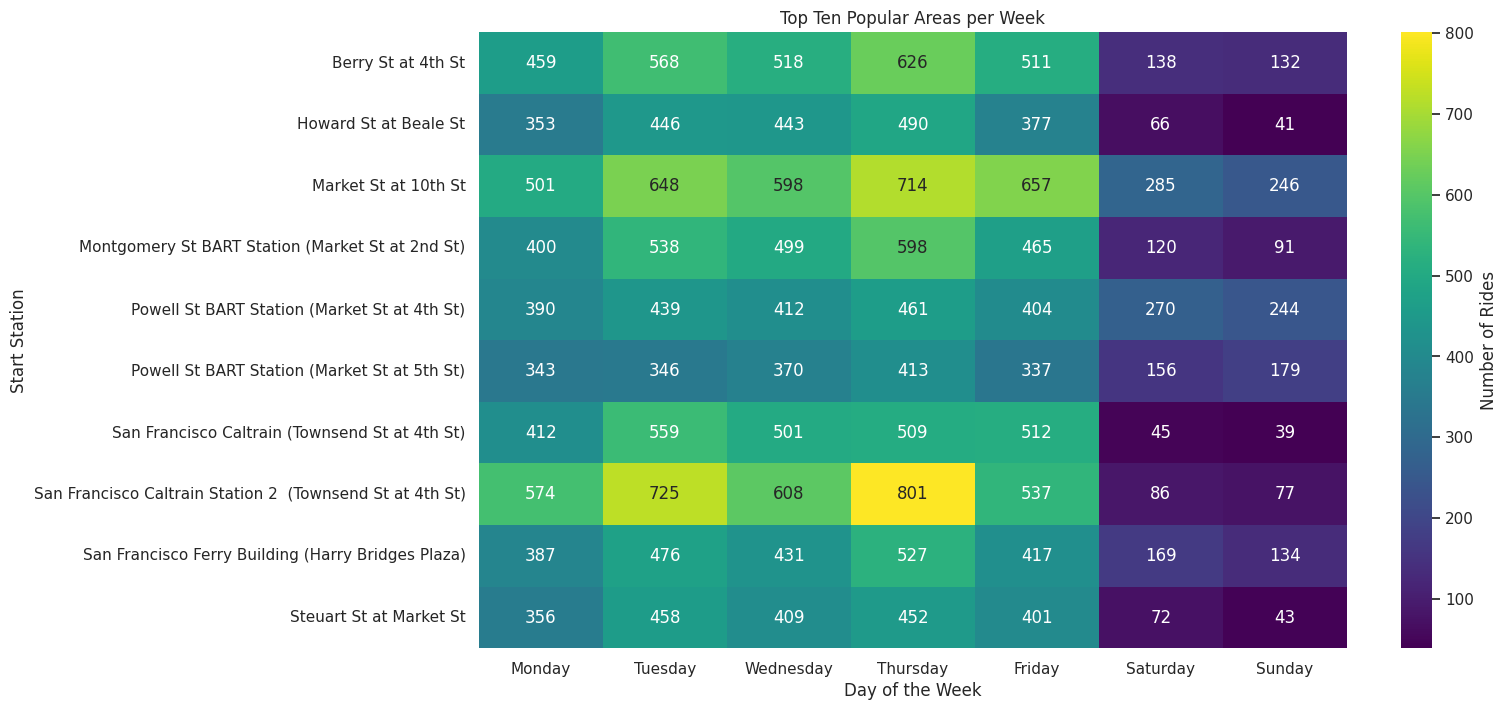

In [67]:
# Create a DataFrame with columns for start and end stations, day, and count of rides
popular_areas_df = Bikedata_cleaned.groupby(['start_station_name', 'end_station_name', 'Start_day']).size().reset_index(name='Ride_Count')

# Calculate the total number of rides for each start station
top_stations = popular_areas_df.groupby('start_station_name')['Ride_Count'].sum().sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only the top ten stations
filtered_popular_areas_df = popular_areas_df[popular_areas_df['start_station_name'].isin(top_stations)]

# Pivot the DataFrame to get a matrix for the heatmap
heatmap_data = filtered_popular_areas_df.pivot_table(index='start_station_name', columns='Start_day', values='Ride_Count', aggfunc='sum', fill_value=0)

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Number of Rides'})
plt.title('Top Ten Popular Areas per Week')
plt.xlabel('Day of the Week')
plt.ylabel('Start Station')
plt.show()

Two start stations are popular per week on Tuesdays and Thursdays, being San Francisco Caltrain Station 2 and Market St at 10th St respectively.

In [65]:
Bikedata_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

#### Average trip duration by Gender

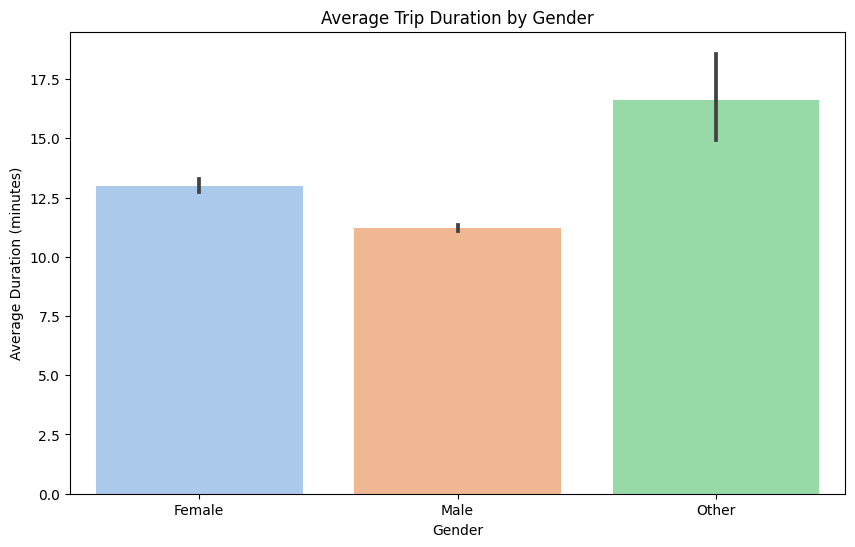

In [69]:
# Calculate duration in minutes
Bikedata_cleaned['duration_min'] = Bikedata_cleaned['duration_sec'] / 60

# Create a bar plot for average trip duration by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='member_gender', y='duration_min', data=Bikedata_cleaned, palette='pastel')
plt.title('Average Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Duration (minutes)')
plt.show()

The gender Other has a higher avaerage trip duration, followed by females.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Between 7 am and 9 am, Subscribers experience a significant increase in trip volume, with another peak observed in the afternoon, specifically between 4:00 pm and 6:00 pm. During these periods, Customers also engage in rides, albeit with comparatively lower trip counts. Notably, the gender category 'Other' displays a longer average duration at 16.62 minutes.

For females, the age distribution spans from 18 to 53 years, but instances of users aged over 60, extending up to 141 years, are notable. In contrast, males show a minimum age of 18 and a maximum of 55, with occurrences of users over 60 years old.

As indicated by the visualizations, there is no discernible correlation between 'duration_sec', 'member_birth_year', and 'user_age'. However, a slight negative correlation is observed between 'member_birth_year' and 'user_age'.

Two start stations emerge as popular per week on Tuesdays and Thursdays: San Francisco Caltrain Station 2 and Market St at 10th St.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Males have a higher trip records yet their average trip duration is lower than the rest of the Genders.

## Multivariate Exploration


#### How do usage patterns vary over different times considering user type and gender?

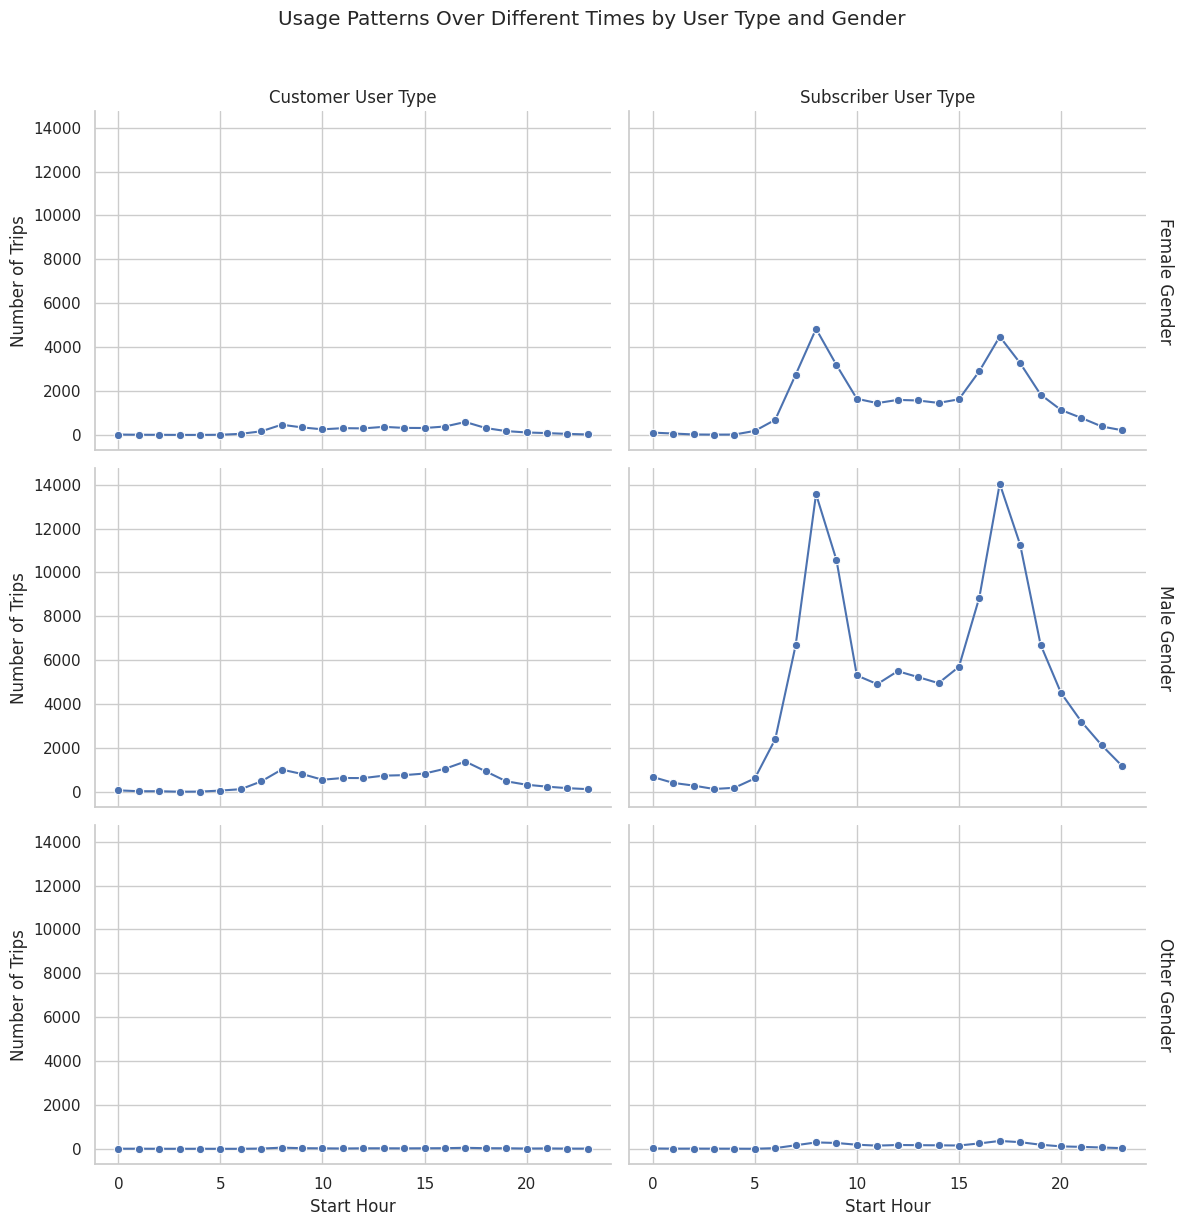

In [79]:
# Extract the hour from 'start_time'
Bikedata_cleaned['Start_hour'] = Bikedata_cleaned['start_time'].dt.hour

# Create a DataFrame with counts of trips based on user type, gender, and hour
usage_patterns = Bikedata_cleaned.groupby(['Start_hour', 'user_type', 'member_gender']).size().reset_index(name='Trip_Count')

# Create a FacetGrid with user_type and member_gender as facets
g = sns.FacetGrid(usage_patterns, col="user_type", row="member_gender", margin_titles=True, height=4, aspect=1.5)
g.map(sns.lineplot, "Start_hour", "Trip_Count", marker="o", errorbar=None)
g.set_axis_labels("Start Hour", "Number of Trips")
g.set_titles(col_template="{col_name} User Type", row_template="{row_name} Gender")
g.fig.suptitle('Usage Patterns Over Different Times by User Type and Gender', y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()

Females from the Subscriber user type have a higher number of trips than the ones from Customers user type. It is worth to note that males are leading the pack in the Subscriber user type during the peak hours 

#### How does the average trip duration vary across different user types and days of the week, considering the influence of member gender, and are there any noticeable trends or interactions between these variables?

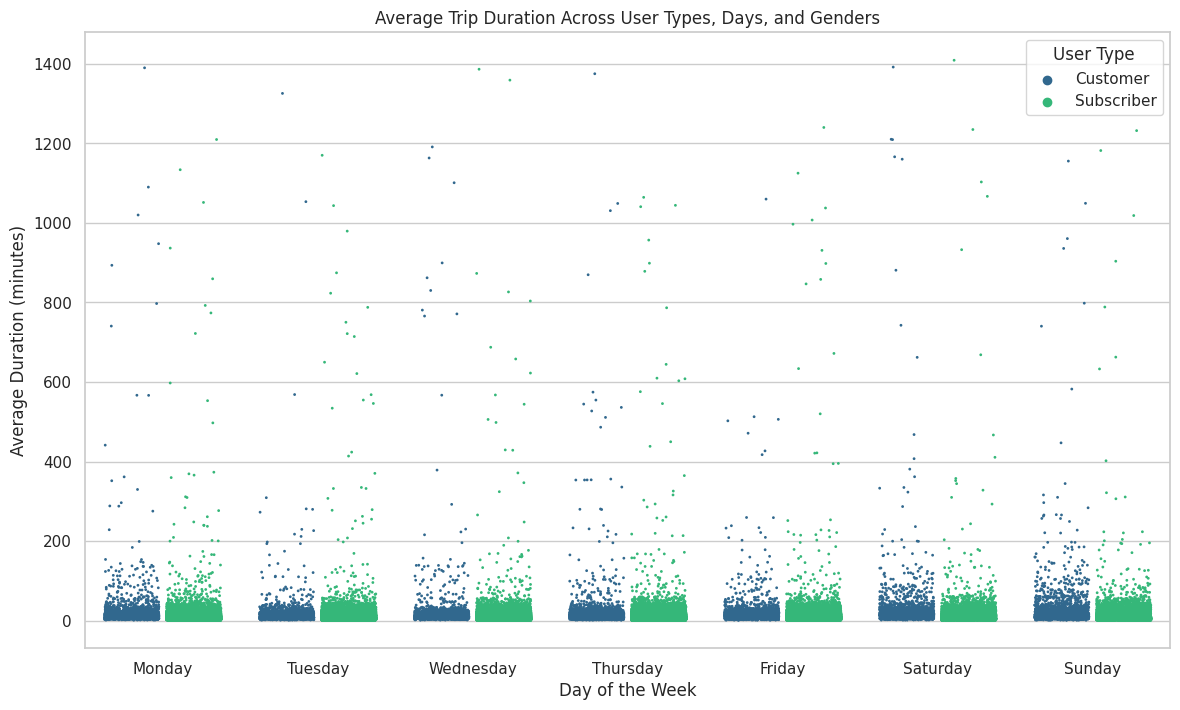

In [86]:
# Calculate duration in minutes
Bikedata_cleaned['duration_min'] = Bikedata_cleaned['duration_sec'] / 60

# Create a multivariate point plot
plt.figure(figsize=(14, 8))
sns.stripplot(x='Start_day', y='duration_min', hue='user_type', data=Bikedata_cleaned, palette='viridis',
              size=2, jitter=0.35, dodge=True)
plt.title('Average Trip Duration Across User Types, Days, and Genders')
plt.xlabel('Day of the Week')
plt.ylabel('Average Duration (minutes)')
plt.legend(title='User Type', bbox_to_anchor=(1, 1))
plt.show()

#### What is the Correlation between each variable in the dataset? (Numerical Variables only)

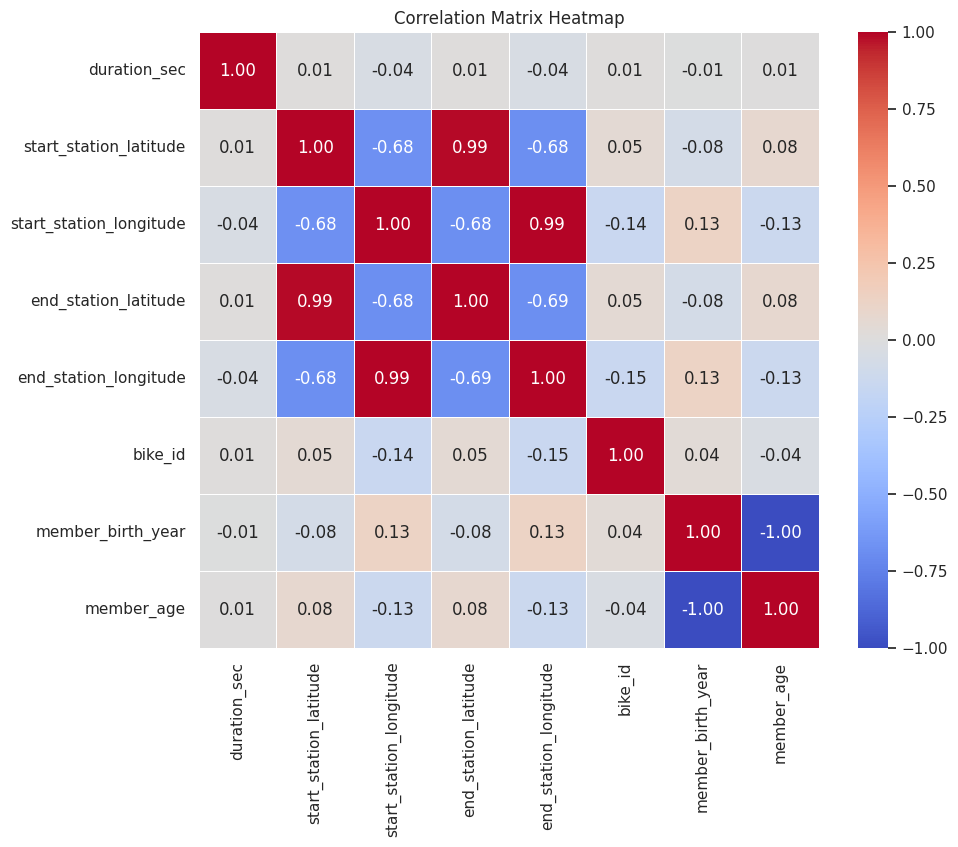

In [90]:
# Calculate members' age from birth year
Bikedata_cleaned['member_age'] = 2019 - Bikedata_cleaned['member_birth_year']

# Select numerical columns for correlation analysis
numerical_columns = ['duration_sec', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude',
                      'end_station_longitude', 'bike_id', 'member_birth_year', 'member_age']

# Calculate correlation matrix
correlation_matrix = Bikedata_cleaned[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There is no observable correlation for any variable with time (duration in seconds/minutes/hours). A weak correlation is identified between 'start_station_id' and both 'start_station_longitude' and 'end_station_longitude,' suggesting that station location may be a noteworthy factor to explore in my marketing campaign. Additionally, a strong correlation exists between 'start_station_longitude' and 'end_station_longitude,' emphasizing the importance of studying station locations in my marketing campaign.

Member age does not exhibit a positive correlation with trip duration.

Among the Subscriber user type, females surpass the number of trips made by Customer user type females. It is noteworthy that during peak hours, males take the lead in the Subscriber user type.

### Were there any interesting or surprising interactions between features?

There are more customers than subscribers. Males from Subscribers user type are outperforming females despite the lower trip durations in all the user types.

## Conclusions

As member age goes higher the number or frequency of trips reduces drastically. More trips are shown to be more denser around 18 and 55yrs.
Females take more trips than men.

Peak hours are between 1600hrs and 1800hrs which might be related to the knock off times for individuals.

Bike duration is between 11mins and 16mins. 

Most of the bike users are aged between 18 and 41yrs. Although there are outliers beyond the age of 55, They were incorporated in this dataset as might bring insights to the analysis.

Tuesday and Thursday has the most usage of the bikes, with popular stations such as San Francisco Caltrain Station 2 and Market St at 10th St respectively.

Peak hours for this trip dataset is between 7am and 9am in the morning and 1600hrs to 18hrs in the afternoon.

Subscribers use mpre bikes than customers. 

#### Limitations
There was missing data, so some of the records were dropped to aid for the exploratory analysis.

There were age outliers exceeding 80yrs.

> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML.


> At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!



##### Saving the cleaned data

In [29]:
Bikedata_cleaned.to_csv('Bikedata_cleaned.csv', index = False)